[[64  4]
 [ 4 28]]
0.92


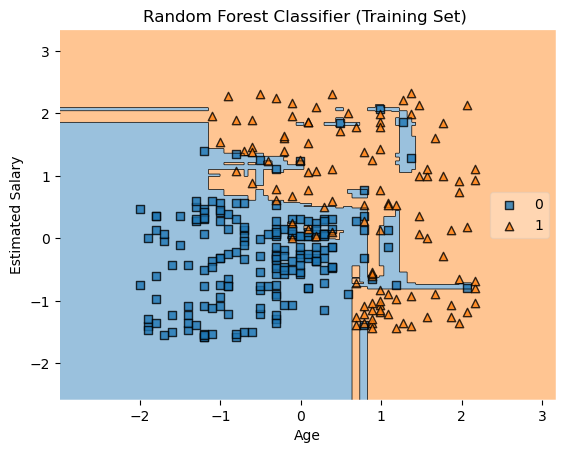

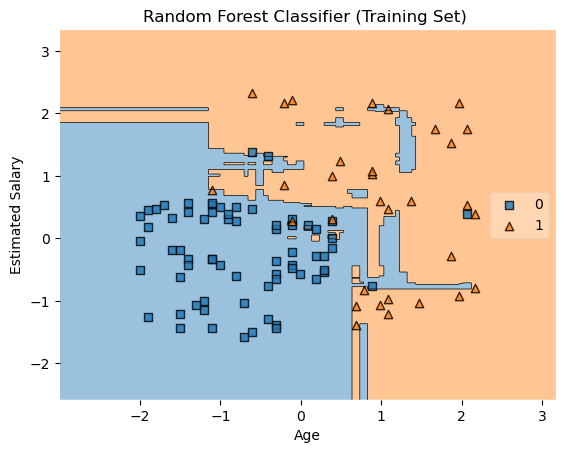

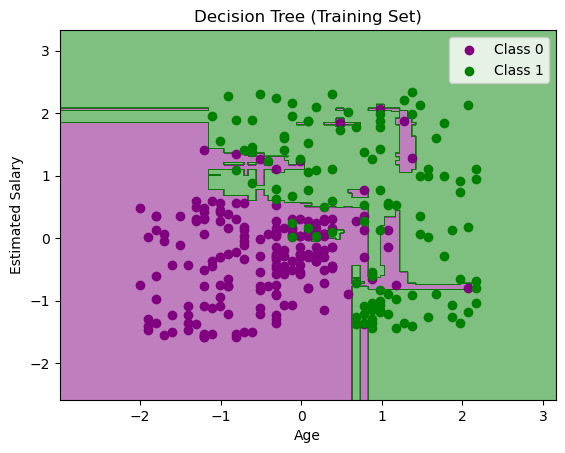

In [9]:
import numpy as nm
import matplotlib.pyplot as mtp 
import pandas as pd

data_set= pd.read_csv('user_data.csv')

x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train) 
x_test= st_x.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test)

from sklearn.metrics import confusion_matrix 
cm= confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(x_train, y_train, clf=classifier, legend=5)
plt. xlabel ( 'Age')
plt. ylabel ('Estimated Salary')
plt. title('Random Forest Classifier (Training Set) ')
plt.show()

plot_decision_regions(x_test, y_test, clf=classifier, legend=5)
plt.xlabel ( 'Age')
plt.ylabel ('Estimated Salary')
plt.title('Random Forest Classifier (Training Set) ')
plt.show()
# train
def plot_decision_boundary(classifier, X, y, title="Decision Boundary", xlabel="Feature 1", ylabel="Feature 2"):
    import numpy as np
    from matplotlib.colors import ListedColormap
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

    # Predict and reshape for visualization
    preds = classifier.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    # Plot the decision boundary
    plt.contourf(x1, x2, preds, alpha=0.5, cmap=ListedColormap(['purple', 'green']))

    # Scatter plot for data points
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1], color=ListedColormap(['purple', 'green'])(i), label=f"Class {j}")

    # Titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_decision_boundary(classifier, x_train, y_train, title="Decision Tree (Training Set)", xlabel="Age", ylabel="Estimated Salary")